## Assignment 2: Time Series Forecasting

### \<your name> \<your id>

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

In [2]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from statsmodels.tsa.stattools import adfuller

Import library

In [3]:
df = pd.read_csv('energydata_complete.csv')

Read data set

In [4]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

Converts the date column to date-time format and sets it as an index

### 2. Analyse and visualise the data

In [5]:
df.dropna(axis=0, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.interpolate(inplace=True)




The role of this code is to deal with missing values in the data box, through deletion, mean filling and interpolation methods to deal with missing values to ensure data integrity and availability.

In [6]:
print(df.head())  
print(df.describe())  
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Appliances'])
plt.xlabel('Date')
plt.ylabel('Appliances')
plt.title('Energy Usage Over Time')
plt.grid(True)
plt.show()

                     Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

                        T3       RH_3         T4       RH_4  ...         T9  \
date                                                         ...              
2016-01-11 17:00:00  19.79  44.730000  19.000000  45.566667  ...  17.033333   
2016-01-11 17:10:00  19.79  44.790000  19.000000  45.992500  ...  17.066667   
2016-01-11 17:20:00  19.79  44.933333  18.926667  45.890000  ...  17.000000   
2016-01-11 17:30:00  19.79  45.000000  18.890000  45.72333

KeyError: 'date'

<Figure size 1200x600 with 0 Axes>

Data preprocessing
1. View the first few lines of data
2. Data summary statistics

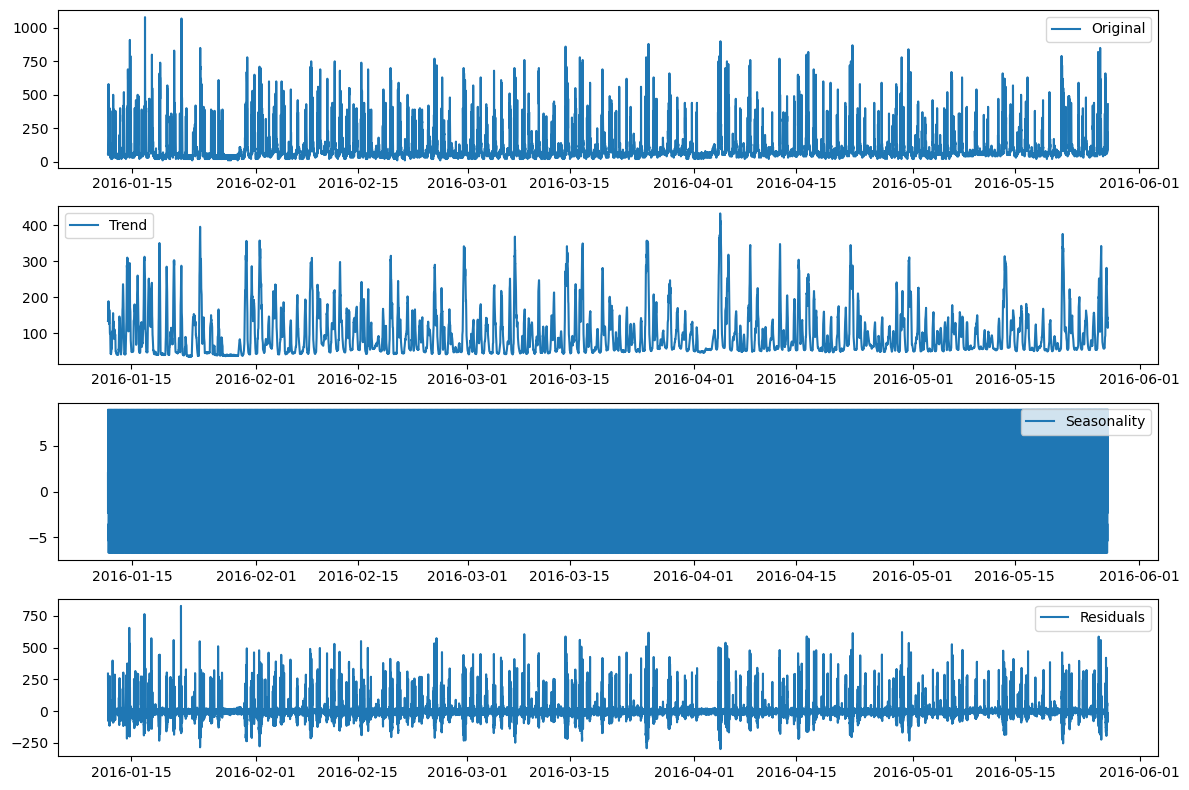

In [24]:
decomposition = seasonal_decompose(df['Appliances'], model='additive', period=24)  
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Appliances'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

 Data preprocessing
 1.Analyze and visualize data
 2.The Appliances column is visualized here using a seasonal breakdown

In [6]:
print(df.head())
print(df.info())
print(df.columns)

                     Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

                        T3       RH_3         T4       RH_4  ...         T9  \
date                                                         ...              
2016-01-11 17:00:00  19.79  44.730000  19.000000  45.566667  ...  17.033333   
2016-01-11 17:10:00  19.79  44.790000  19.000000  45.992500  ...  17.066667   
2016-01-11 17:20:00  19.79  44.933333  18.926667  45.890000  ...  17.000000   
2016-01-11 17:30:00  19.79  45.000000  18.890000  45.72333

.Check the column names in your DataFrame 2.Check the data structure

In [9]:
# 选择数值型列进行缩放处理
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
scaler = MinMaxScaler(feature_range=(0, 1))
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# 输出缩放后的数据
print(df.head())

                     Appliances    lights       T1      RH_1        T2  \
date                                                                     
2016-01-11 17:00:00    0.046729  0.428571  0.32735  0.566187  0.225345   
2016-01-11 17:10:00    0.046729  0.428571  0.32735  0.541326  0.225345   
2016-01-11 17:20:00    0.037383  0.428571  0.32735  0.530502  0.225345   
2016-01-11 17:30:00    0.037383  0.571429  0.32735  0.524080  0.225345   
2016-01-11 17:40:00    0.046729  0.571429  0.32735  0.531419  0.225345   

                         RH_2        T3      RH_3        T4      RH_4  ...  \
date                                                                   ...   
2016-01-11 17:00:00  0.684038  0.215188  0.746066  0.351351  0.764262  ...   
2016-01-11 17:10:00  0.682140  0.215188  0.748871  0.351351  0.782437  ...   
2016-01-11 17:20:00  0.679445  0.215188  0.755569  0.344745  0.778062  ...   
2016-01-11 17:30:00  0.678414  0.215188  0.758685  0.341441  0.770949  ...   
2016-01-11 17

In [11]:
# 使用均值填充缺失值
df.fillna(df.mean(), inplace=True)

# 输出处理后的数据
print(df.head())


                     Appliances    lights       T1      RH_1        T2  \
date                                                                     
2016-01-11 17:00:00    0.046729  0.428571  0.32735  0.566187  0.225345   
2016-01-11 17:10:00    0.046729  0.428571  0.32735  0.541326  0.225345   
2016-01-11 17:20:00    0.037383  0.428571  0.32735  0.530502  0.225345   
2016-01-11 17:30:00    0.037383  0.571429  0.32735  0.524080  0.225345   
2016-01-11 17:40:00    0.046729  0.571429  0.32735  0.531419  0.225345   

                         RH_2        T3      RH_3        T4      RH_4  ...  \
date                                                                   ...   
2016-01-11 17:00:00  0.684038  0.215188  0.746066  0.351351  0.764262  ...   
2016-01-11 17:10:00  0.682140  0.215188  0.748871  0.351351  0.782437  ...   
2016-01-11 17:20:00  0.679445  0.215188  0.755569  0.344745  0.778062  ...   
2016-01-11 17:30:00  0.678414  0.215188  0.758685  0.341441  0.770949  ...   
2016-01-11 17

In [12]:
numeric_df = df.select_dtypes(include=['int', 'float'])
numeric_df += 1e-6  
log_numeric_df = np.log(numeric_df)

Handles numeric (integer and floating-point) data in a data frame

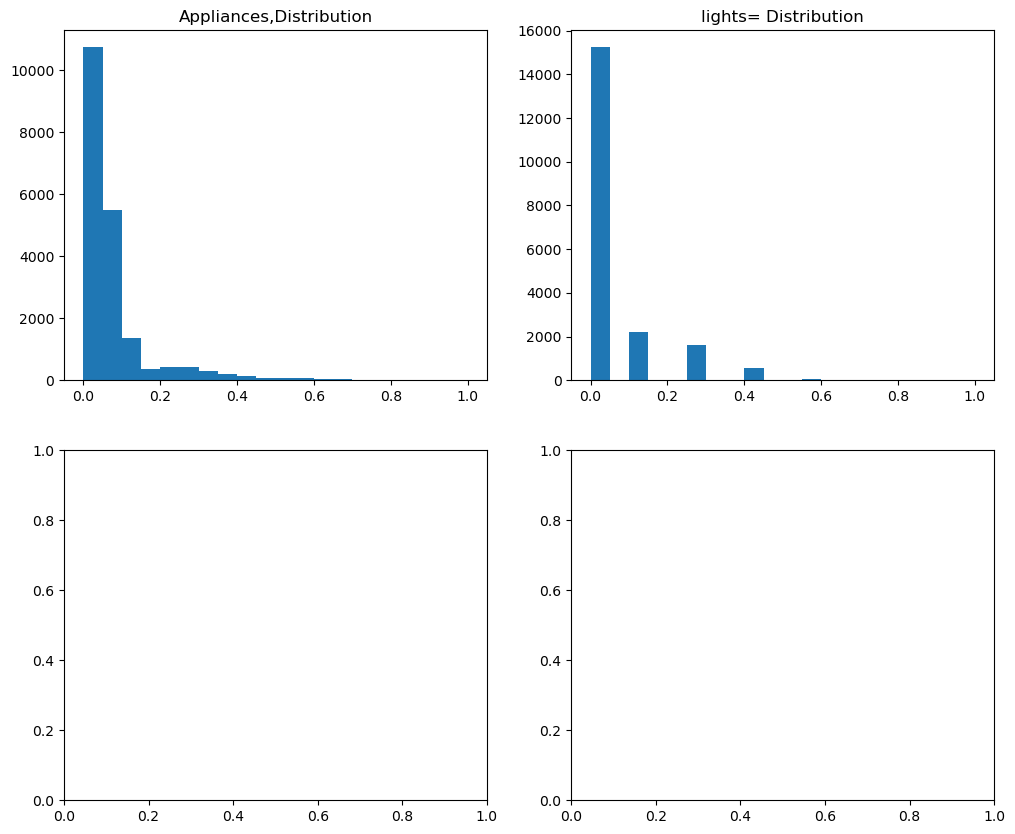

In [13]:
Appliances = df['Appliances']
lights= df['lights']


fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].hist(Appliances,bins=20)
axs[0, 0].set_title('Appliances,Distribution')
axs[0, 1].hist(lights, bins=20)
axs[0, 1].set_title('lights= Distribution')


plt.show()


IndexError: list index out of range

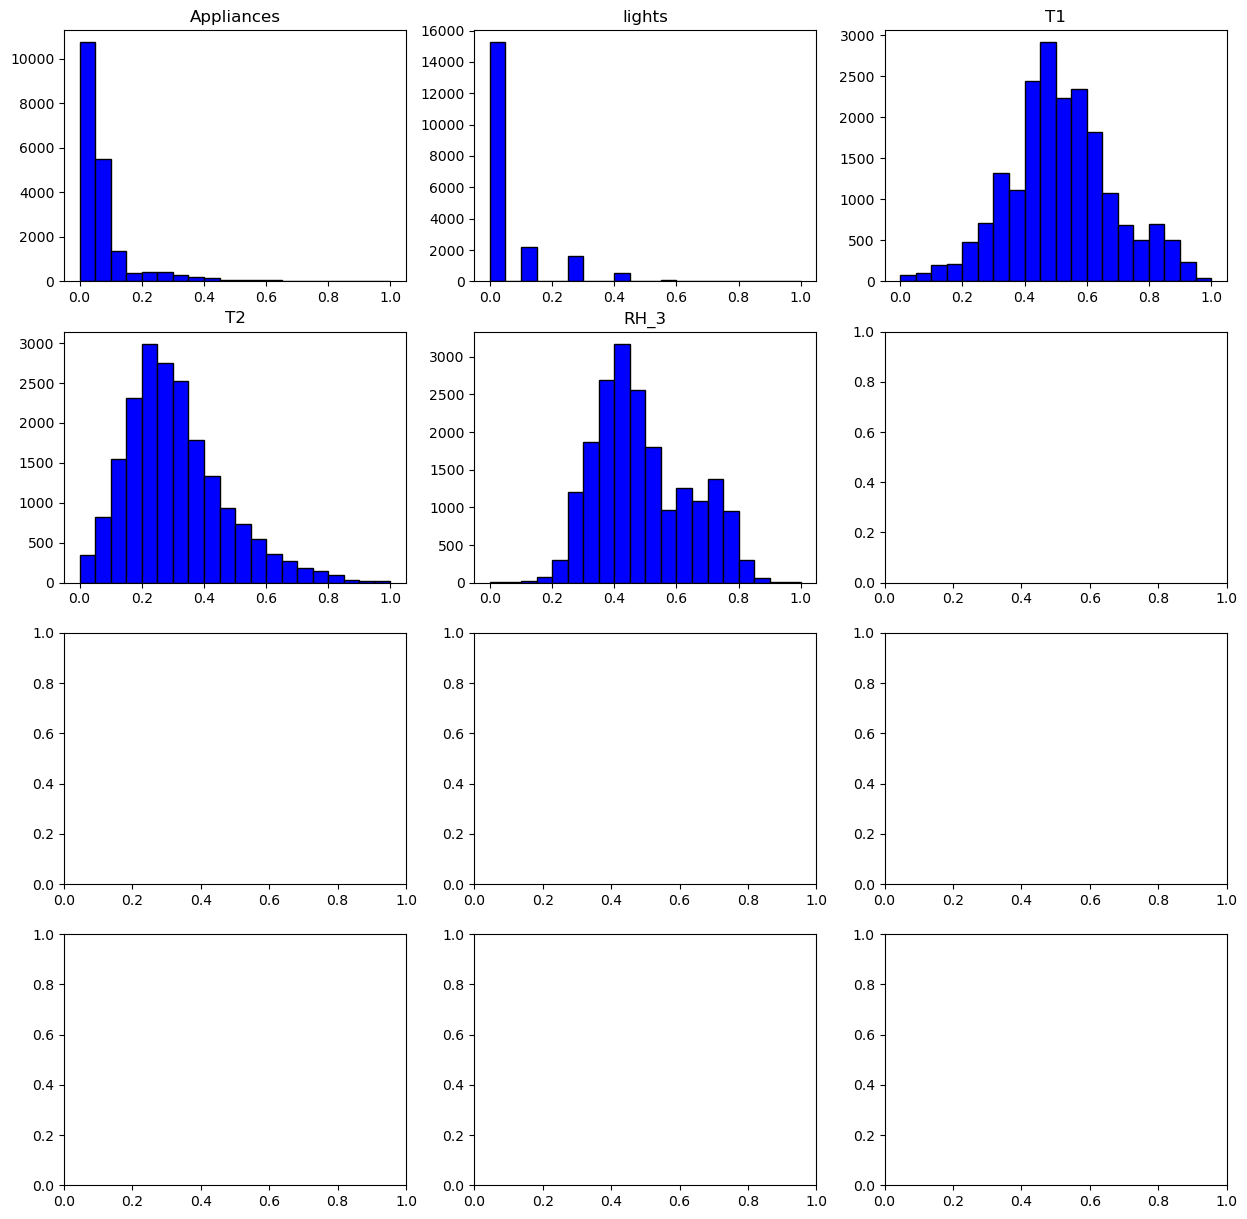

In [14]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
features = ['Appliances', 'lights', 'T1', 'T2', 'RH_3']
for i, ax in enumerate(axes.flat):
    ax.hist(df[features[i]], bins=20, color='blue', edgecolor='black')
    ax.set_title(features[i])
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.head())
print(df.describe())
sns.pairplot(df)
plt.show()



                     Appliances    lights       T1      RH_1        T2  \
date                                                                     
2016-01-11 17:00:00    0.046729  0.428571  0.32735  0.566187  0.225345   
2016-01-11 17:10:00    0.046729  0.428571  0.32735  0.541326  0.225345   
2016-01-11 17:20:00    0.037383  0.428571  0.32735  0.530502  0.225345   
2016-01-11 17:30:00    0.037383  0.571429  0.32735  0.524080  0.225345   
2016-01-11 17:40:00    0.046729  0.571429  0.32735  0.531419  0.225345   

                         RH_2        T3      RH_3        T4      RH_4  ...  \
date                                                                   ...   
2016-01-11 17:00:00  0.684038  0.215188  0.746066  0.351351  0.764262  ...   
2016-01-11 17:10:00  0.682140  0.215188  0.748871  0.351351  0.782437  ...   
2016-01-11 17:20:00  0.679445  0.215188  0.755569  0.344745  0.778062  ...   
2016-01-11 17:30:00  0.678414  0.215188  0.758685  0.341441  0.770949  ...   
2016-01-11 17

Visualize the time series data

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df['Appliances'])
plt.title('Home Energy Usage')
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller
print(df.columns)
result = adfuller(df['Appliances'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


1.Test for stationarity 2.Assuming 'Appliances' represents energy usage

In [29]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

### 3. Implement prediction models

In [12]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]
model = ARIMA(train['Appliances'], order=(5,1,0))
model_fit = model.fit()


C:\Users\zhang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
C:\Users\zhang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
C:\Users\zhang\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)


Use the ARIMA model

In [35]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")


Assuming df is your pandas DataFrame with 'Appliances' column
Ignore possible warning messages
Fit ARIMA model
Make predictions
Change steps as needed
Plotting

In [34]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

Examples of seasonal Naive methods

### 4. Train prediction models

In [14]:
predictions = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test['Appliances'], predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 17935.766722000397


Test the ARIMA model

In [15]:
seasonal_last_day = df.iloc[-24:]


future_dates = pd.date_range(start=df.index[-1], periods=24, freq='H')
future_df = pd.DataFrame(index=future_dates, columns=df.columns)


for col in future_df.columns:
    future_df[col] = seasonal_last_day[col].values


1. Create a DataFrame that contains a future date
2. Fill in seasonal data

In [32]:
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]
def create_dataset(dataset, look_back=60):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
look_back = 60
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [37]:
model = ARIMA(df['Appliances'], order=(1, 1, 1))
results = model.fit()
forecast = results.forecast(steps=10)  


### 5. Test predictin models and show results

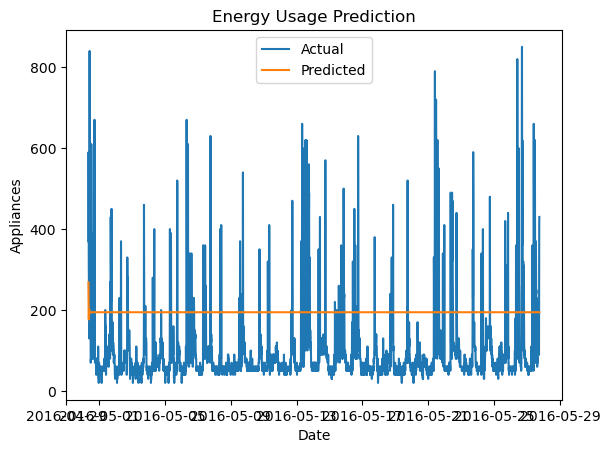

In [16]:

test.index = pd.to_datetime(test.index)

plt.plot(test.index, test['Appliances'], label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Appliances')
plt.title('Energy Usage Prediction')
plt.legend()
plt.show()



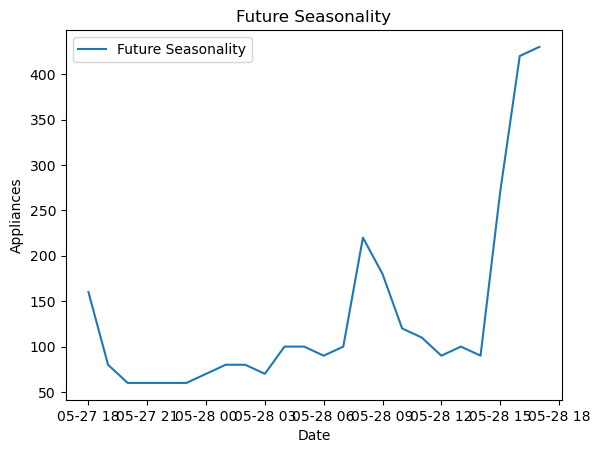

In [17]:
plt.plot(future_df.index, future_df['Appliances'], label='Future Seasonality')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Appliances')
plt.title('Future Seasonality')
plt.show()

Show seasonal data for future dates

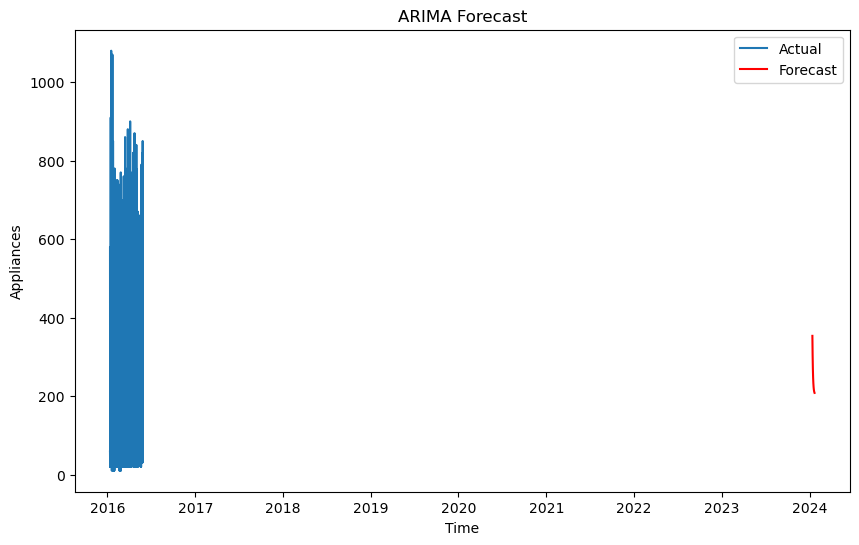

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(df['Appliances'], label='Actual')
plt.plot(range(len(df['Appliances']), len(df['Appliances']) + len(forecast)), forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Appliances')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

Compare the results from all candidate models, choose the best model, justify your choice and discuss the results.

In [39]:
model_es = ExponentialSmoothing(train['Appliances'])
model_fit_es = model_es.fit()
predictions_es = model_fit_es.forecast(steps=len(test))
mse_es = mean_squared_error(test['Appliances'], predictions_es)
print('Mean Squared Error (Exponential Smoothing):', mse_es)


Mean Squared Error (Exponential Smoothing): 40131.04127007308


### 7. Reflect on what you have learned by completing this assignment

### 8. References